## Preludium

In [1]:
# First, I have to laod different modules that I use for analyzing the data and for plotting:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
# Second, I have to load the Text Fabric app
from tf.fabric import Fabric
from tf.app import use

In [4]:
# Now we load the TF bhsa database
OT = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf')

## War as Worship
### Data-gathering
#### Pred + Objc

In [253]:
FormsOfKillingPredObjc='''
clause
    phrase function=Pred
        word lex=HRG[|MWT[|QVL[|VBX[|CXV[ lex_utf8 bol_dict_EN bol_dict_HebArm
    phrase function=Objc
        word lex lex_utf8 sp=subs|nmpr bol_dict_EN bol_dict_HebArm
'''
FormsOfKillingPredObjc  = OT.search(FormsOfKillingPredObjc)
OT.table(FormsOfKillingPredObjc, start=1, end=2, condensed=False, colorMap={2: 'magenta'})

  1.68s 295 results


n,p,clause,phrase,word,phrase,word
1,Genesis 4:23,כִּ֣י אִ֤ישׁ הָרַ֨גְתִּי֙ לְפִצְעִ֔י,הָרַ֨גְתִּי֙,הָרַ֨גְתִּי֙,אִ֤ישׁ,אִ֤ישׁ
2,Genesis 20:4,הֲגֹ֥וי גַּם־צַדִּ֖יק תַּהֲרֹֽג׃,תַּהֲרֹֽג׃,תַּהֲרֹֽג׃,גֹ֥וי גַּם־צַדִּ֖יק,גֹ֥וי


In [254]:
OT.export(FormsOfKillingPredObjc, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/3-A13_BibleBook_OT_Jeremiah', toFile='FormsOfKillingPredObjc.tsv')

In [255]:
FormsOfKillingPredObjc=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/3-A13_BibleBook_OT_Jeremiah/FormsOfKillingPredObjc.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
FormsOfKillingPredObjc.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,lex3,lex_utf83,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,bol_dict_EN5,bol_dict_HebArm5,lex5,lex_utf85,sp5
0,1,Genesis,4,23,427970,clause,כִּ֣י אִ֤ישׁ הָרַ֨גְתִּי֙ לְפִצְעִ֔י,652804,phrase,הָרַ֨גְתִּי֙,Pred,2060,word,הָרַ֨גְתִּי֙,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,652803,phrase,אִ֤ישׁ,Objc,2059,word,אִ֤ישׁ,man; human being; somebody; each one,אִישׁ,>JC/,אישׁ,subs
1,2,Genesis,20,4,429301,clause,הֲגֹ֥וי גַּם־צַדִּ֖יק תַּהֲרֹֽג׃,656934,phrase,תַּהֲרֹֽג׃,Pred,9317,word,תַּהֲרֹֽג׃,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,656933,phrase,גֹ֥וי גַּם־צַדִּ֖יק,Objc,9314,word,גֹ֥וי,"people, nation",גֹּוי,GWJ/,גוי,subs
2,3,Genesis,22,10,429540,clause,לִשְׁחֹ֖ט אֶת־בְּנֹֽו׃,657689,phrase,לִשְׁחֹ֖ט,Pred,10467,word,שְׁחֹ֖ט,"qal: slaughter, kill; ni: be slaughtered;",שׁחט I,CXV[,שׁחט,657690,phrase,אֶת־בְּנֹֽו׃,Objc,10469,word,בְּנֹֽו׃,son,בֵּן I,BN/,בן,subs
3,4,Genesis,27,41,430427,clause,וְאַֽהַרְגָ֖ה אֶת־יַעֲקֹ֥ב אָחִֽי׃,660252,phrase,אַֽהַרְגָ֖ה,Pred,14392,word,אַֽהַרְגָ֖ה,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,660253,phrase,אֶת־יַעֲקֹ֥ב אָחִֽי׃,Objc,14394,word,יַעֲקֹ֥ב,Jacob,יַעֲקֹב,J<QB/,יעקב,nmpr
4,5,Genesis,27,41,430427,clause,וְאַֽהַרְגָ֖ה אֶת־יַעֲקֹ֥ב אָחִֽי׃,660252,phrase,אַֽהַרְגָ֖ה,Pred,14392,word,אַֽהַרְגָ֖ה,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,660253,phrase,אֶת־יַעֲקֹ֥ב אָחִֽי׃,Objc,14395,word,אָחִֽי׃,brother,אָח I,>X/,אח,subs


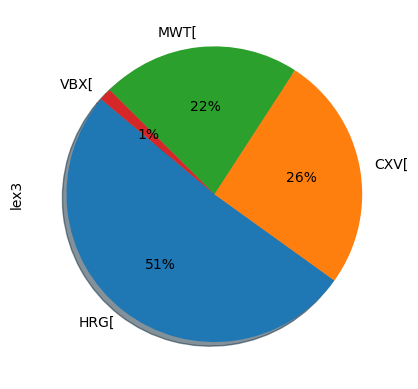

In [256]:
FormsOfKillingPredObjc.lex3.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

ValueError: could not convert string to float: 'Genesis'

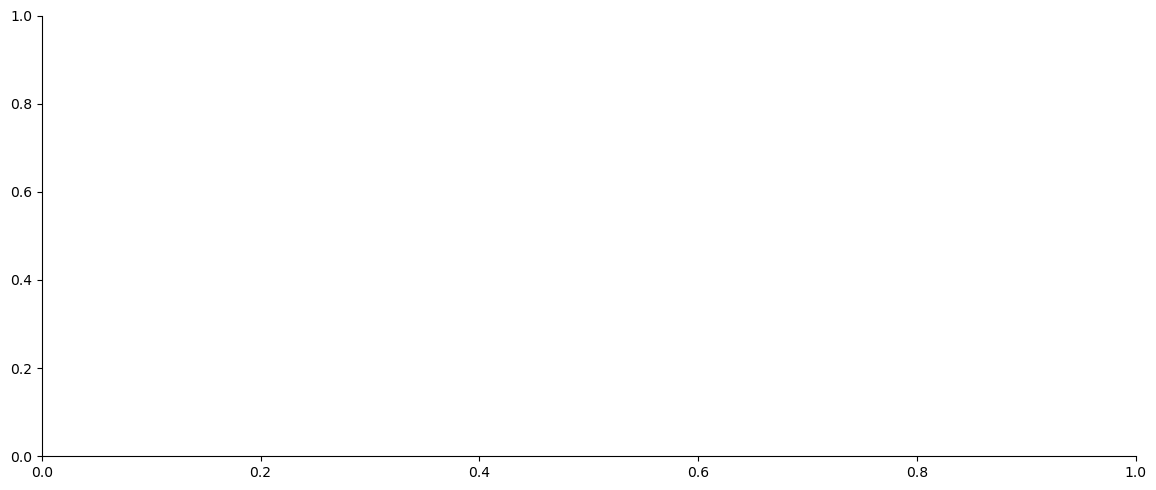

In [143]:
sns.lmplot(x="S1", y="R", data=FormsOfKillingPredObjc, hue='lex3', height=5, aspect=7/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

##### HRG[
This is the default word used for homicide. and appears a total of 151 (Pred+Objc) + 42 (PreO) in the TNK with the vast majority of objects referring to sons, men, brother, king, prophet, warrior, 1000s, 100s, women, priest. 
WHile one can also HRG[ animals, this is the exception (1x BQR/ in Isa 22:13, BHMH/ 3x). Only two animal words appear in the 193 cases: BQR/, BHMH/. There where BHMH/ appears as object (3x)  it is always related to homicide. So is BHMH/ mentioned as the last element of an object phrase (all the firstborn in the land of Egypt, from human beings and until the firstborn of the cattle. Ex 13:15, also Lev 20:15-16).


In [165]:
HRGPredObjc='''
clause
    phrase function=Pred
        word lex=HRG[ lex_utf8 bol_dict_EN
    phrase function=Objc
        word lex lex_utf8 sp=subs|nmpr bol_dict_EN
'''
HRGPredObjc  = OT.search(HRGPredObjc)
OT.table(HRGPredObjc, start=1, end=1, condensed=False, colorMap={2: 'magenta'})

  1.30s 151 results


n,p,clause,phrase,word,phrase,word
1,Genesis 4:23,כִּ֣י אִ֤ישׁ הָרַ֨גְתִּי֙ לְפִצְעִ֔י,הָרַ֨גְתִּי֙,הָרַ֨גְתִּי֙,אִ֤ישׁ,אִ֤ישׁ


In [167]:
HRGPredObjc='''
clause
    phrase function=PreO
        word lex=HRG[ lex_utf8 bol_dict_EN

'''
HRGPredObjc  = OT.search(HRGPredObjc)
OT.table(HRGPredObjc, start=1, end=1, condensed=False, colorMap={2: 'magenta'})

  0.47s 42 results


n,p,clause,phrase,word
1,Genesis 4:8,וַיַּהַרְגֵֽהוּ׃,יַּהַרְגֵֽהוּ׃,יַּהַרְגֵֽהוּ׃


In [173]:
HRGPredObjc='''
clause
    phrase function=Pred
        word lex=HRG[ lex_utf8 bol_dict_EN
    phrase function=Objc
        word lex=BHMH/|BQR/ lex_utf8 sp=subs|nmpr bol_dict_EN
'''
HRGPredObjc  = OT.search(HRGPredObjc)
OT.table(HRGPredObjc, start=1, end=100, condensed=False, colorMap={2: 'magenta'})

  0.94s 4 results


n,p,clause,phrase,word,phrase,word
1,Exodus 13:15,וַיַּהֲרֹ֨ג יְהֹוָ֤ה כָּל־בְּכֹור֙ בְּאֶ֣רֶץ מִצְרַ֔יִם מִבְּכֹ֥ר אָדָ֖ם וְעַד־בְּכֹ֣ור בְּהֵמָ֑ה,יַּהֲרֹ֨ג,יַּהֲרֹ֨ג,כָּל־בְּכֹור֙ בְּאֶ֣רֶץ מִצְרַ֔יִם מִבְּכֹ֥ר אָדָ֖ם וְעַד־בְּכֹ֣ור בְּהֵמָ֑ה,בְּהֵמָ֑ה
2,Leviticus 20:15,וְאֶת־הַבְּהֵמָ֖ה תַּהֲרֹֽגוּ׃,תַּהֲרֹֽגוּ׃,תַּהֲרֹֽגוּ׃,אֶת־הַבְּהֵמָ֖ה,בְּהֵמָ֖ה
3,Leviticus 20:16,וְהָרַגְתָּ֥ אֶת־הָאִשָּׁ֖ה וְאֶת־הַבְּהֵמָ֑ה,הָרַגְתָּ֥,הָרַגְתָּ֥,אֶת־הָאִשָּׁ֖ה וְאֶת־הַבְּהֵמָ֑ה,בְּהֵמָ֑ה
4,Isaiah 22:13,הָרֹ֤ג׀ בָּקָר֙,הָרֹ֤ג׀,הָרֹ֤ג׀,בָּקָר֙,בָּקָר֙


In [257]:
HRGPredObjc=(FormsOfKillingPredObjc[FormsOfKillingPredObjc['lex3']=="HRG["])
HRGPredObjc.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,lex3,lex_utf83,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,bol_dict_EN5,bol_dict_HebArm5,lex5,lex_utf85,sp5
0,1,Genesis,4,23,427970,clause,כִּ֣י אִ֤ישׁ הָרַ֨גְתִּי֙ לְפִצְעִ֔י,652804,phrase,הָרַ֨גְתִּי֙,Pred,2060,word,הָרַ֨גְתִּי֙,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,652803,phrase,אִ֤ישׁ,Objc,2059,word,אִ֤ישׁ,man; human being; somebody; each one,אִישׁ,>JC/,אישׁ,subs
1,2,Genesis,20,4,429301,clause,הֲגֹ֥וי גַּם־צַדִּ֖יק תַּהֲרֹֽג׃,656934,phrase,תַּהֲרֹֽג׃,Pred,9317,word,תַּהֲרֹֽג׃,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,656933,phrase,גֹ֥וי גַּם־צַדִּ֖יק,Objc,9314,word,גֹ֥וי,"people, nation",גֹּוי,GWJ/,גוי,subs
3,4,Genesis,27,41,430427,clause,וְאַֽהַרְגָ֖ה אֶת־יַעֲקֹ֥ב אָחִֽי׃,660252,phrase,אַֽהַרְגָ֖ה,Pred,14392,word,אַֽהַרְגָ֖ה,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,660253,phrase,אֶת־יַעֲקֹ֥ב אָחִֽי׃,Objc,14394,word,יַעֲקֹ֥ב,Jacob,יַעֲקֹב,J<QB/,יעקב,nmpr
4,5,Genesis,27,41,430427,clause,וְאַֽהַרְגָ֖ה אֶת־יַעֲקֹ֥ב אָחִֽי׃,660252,phrase,אַֽהַרְגָ֖ה,Pred,14392,word,אַֽהַרְגָ֖ה,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,660253,phrase,אֶת־יַעֲקֹ֥ב אָחִֽי׃,Objc,14395,word,אָחִֽי׃,brother,אָח I,>X/,אח,subs
5,6,Genesis,34,25,431411,clause,וַיַּֽהַרְג֖וּ כָּל־זָכָֽר׃,663248,phrase,יַּֽהַרְג֖וּ,Pred,18923,word,יַּֽהַרְג֖וּ,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,663249,phrase,כָּל־זָכָֽר׃,Objc,18924,word,כָּל־,"all, every",כֹּל,KL/,כל,subs


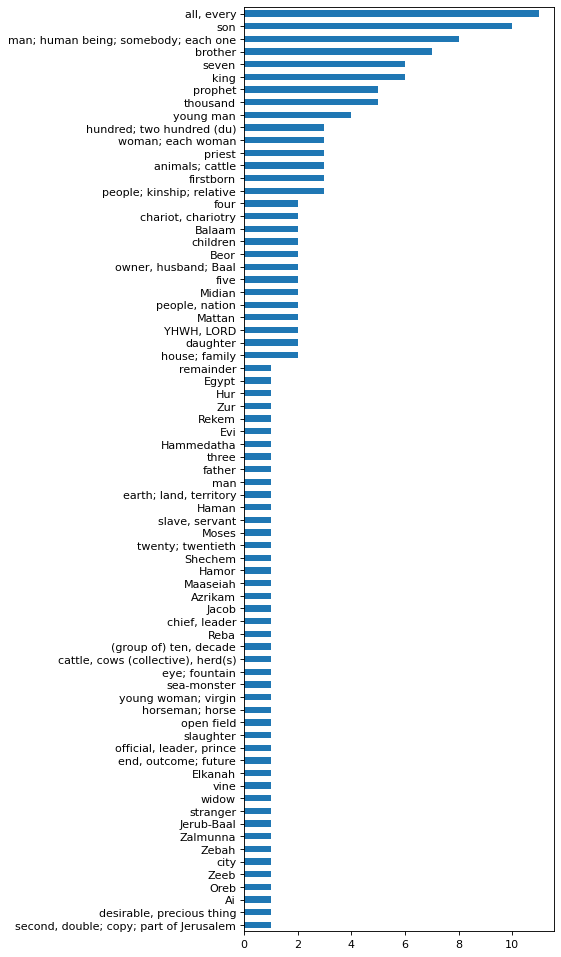

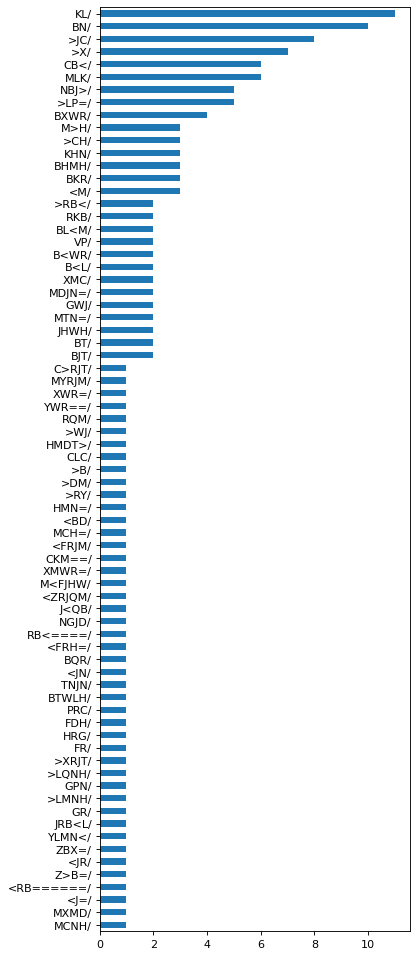

In [258]:
figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
HRGPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
HRGPredObjc.lex5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### MWT[
The standard word for dying of human beings is MWT. In the hifil stem it becomes a synonym for HRG[ and is used to perform homocide (e.g. Gen 42:37). The standard objects are son, man, people, David, women, king, etc.

Like HRG[, one can also MWT[ animals. This is, however, an exception. Only 5 animals appear in the list of objects (donkey, camel, lmb, bull, fish). However, like with HRG[+BHMH/ the animals appear at the end of an object phrase that has human beings at the head of the phrase. Thus, they appear in the context of homicide (1 Sam 15:3) with Psa 105:28 as an exception. 

In [178]:
MWTPredObjc=(FormsOfKillingPredObjc[FormsOfKillingPredObjc['lex3']=="MWT["])
MWTPredObjc.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,bol_dict_EN3,lex3,lex_utf83,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,bol_dict_EN5,lex5,lex_utf85,sp5
12,13,Genesis,42,37,432524,clause,אֶת־שְׁנֵ֤י בָנַי֙ תָּמִ֔ית,666548,phrase,תָּמִ֔ית,Pred,24097,word,תָּמִ֔ית,"qal: die; pi: kill; hi: kill, put to death; ho...",MWT[,מות,666547,phrase,אֶת־שְׁנֵ֤י בָנַי֙,Objc,24095,word,שְׁנֵ֤י,two,CNJM/,שׁנים,subs
13,14,Genesis,42,37,432524,clause,אֶת־שְׁנֵ֤י בָנַי֙ תָּמִ֔ית,666548,phrase,תָּמִ֔ית,Pred,24097,word,תָּמִ֔ית,"qal: die; pi: kill; hi: kill, put to death; ho...",MWT[,מות,666547,phrase,אֶת־שְׁנֵ֤י בָנַי֙,Objc,24096,word,בָנַי֙,son,BN/,בן,subs
26,27,Exodus,16,3,435253,clause,לְהָמִ֛ית אֶת־כָּל־הַקָּהָ֥ל הַזֶּ֖ה בָּרָעָֽב...,674740,phrase,לְהָמִ֛ית,Pred,37429,word,הָמִ֛ית,"qal: die; pi: kill; hi: kill, put to death; ho...",MWT[,מות,674741,phrase,אֶת־כָּל־הַקָּהָ֥ל הַזֶּ֖ה,Objc,37431,word,כָּל־,"all, every",KL/,כל,subs
27,28,Exodus,16,3,435253,clause,לְהָמִ֛ית אֶת־כָּל־הַקָּהָ֥ל הַזֶּ֖ה בָּרָעָֽב...,674740,phrase,לְהָמִ֛ית,Pred,37429,word,הָמִ֛ית,"qal: die; pi: kill; hi: kill, put to death; ho...",MWT[,מות,674741,phrase,אֶת־כָּל־הַקָּהָ֥ל הַזֶּ֖ה,Objc,37433,word,קָּהָ֥ל,"assembly, congregation",QHL/,קהל,subs
28,29,Exodus,17,3,435427,clause,לְהָמִ֥ית אֹתִ֛י וְאֶת־בָּנַ֥י וְאֶת־מִקְנַ֖י ...,675239,phrase,לְהָמִ֥ית,Pred,38195,word,הָמִ֥ית,"qal: die; pi: kill; hi: kill, put to death; ho...",MWT[,מות,675240,phrase,אֹתִ֛י וְאֶת־בָּנַ֥י וְאֶת־מִקְנַ֖י,Objc,38199,word,בָּנַ֥י,son,BN/,בן,subs


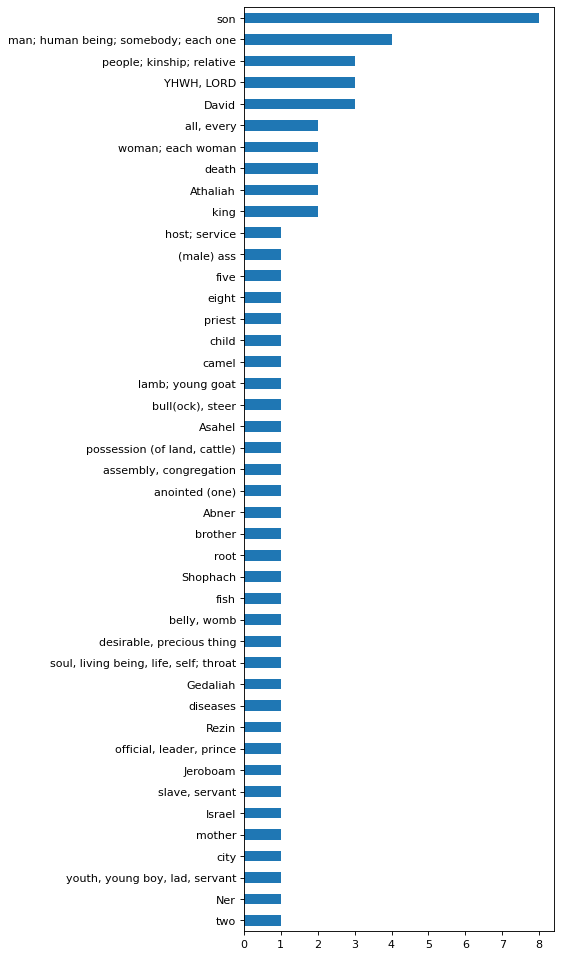

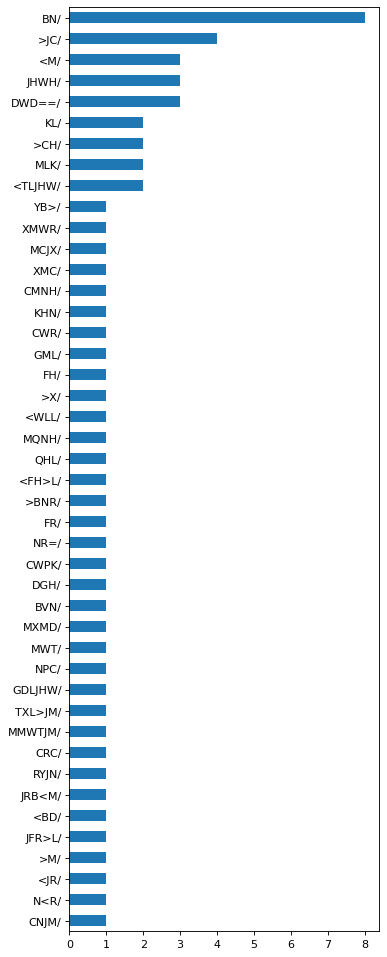

In [179]:
figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
MWTPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
MWTPredObjc.lex5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

In [187]:
MWTPredObjc='''
clause
    phrase function=Pred
        word lex=MWT[ vs=hif lex_utf8 bol_dict_EN
    phrase function=Objc
        word lex=XMWR/|GML/|FH/|CWR/|DGH/ lex_utf8 sp=subs|nmpr bol_dict_EN
'''
MWTPredObjc  = OT.search(MWTPredObjc)
OT.table(MWTPredObjc, start=1, end=5, condensed=False, colorMap={2: 'magenta'})

  0.94s 5 results


n,p,clause,phrase,word,phrase,word
1,1_Samuel 15:3,וְהֵמַתָּ֞ה מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,הֵמַתָּ֞ה,הֵמַתָּ֞ה,מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,שֹּׁ֣ור
2,1_Samuel 15:3,וְהֵמַתָּ֞ה מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,הֵמַתָּ֞ה,הֵמַתָּ֞ה,מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,שֶׂ֔ה
3,1_Samuel 15:3,וְהֵמַתָּ֞ה מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,הֵמַתָּ֞ה,הֵמַתָּ֞ה,מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,גָּמָ֖ל
4,1_Samuel 15:3,וְהֵמַתָּ֞ה מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,הֵמַתָּ֞ה,הֵמַתָּ֞ה,מֵאִ֣ישׁ עַד־אִשָּׁ֗ה מֵֽעֹלֵל֙ וְעַד־יֹונֵ֔ק מִשֹּׁ֣ור וְעַד־שֶׂ֔ה מִגָּמָ֖ל וְעַד־חֲמֹֽור׃ ס,חֲמֹֽור׃ ס
5,Psalms 105:29,וַ֝יָּ֗מֶת אֶת־דְּגָתָֽם׃,יָּ֗מֶת,יָּ֗מֶת,אֶת־דְּגָתָֽם׃,דְּגָתָֽם׃


##### QVL[

In [148]:
QVLPredObjc=(FormsOfKillingPredObjc[FormsOfKillingPredObjc['lex3']=="QVL["])
QVLPredObjc.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,bol_dict_EN3,lex3,lex_utf83,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,bol_dict_EN5,lex5,lex_utf85,sp5


IndexError: index 0 is out of bounds for axis 0 with size 0

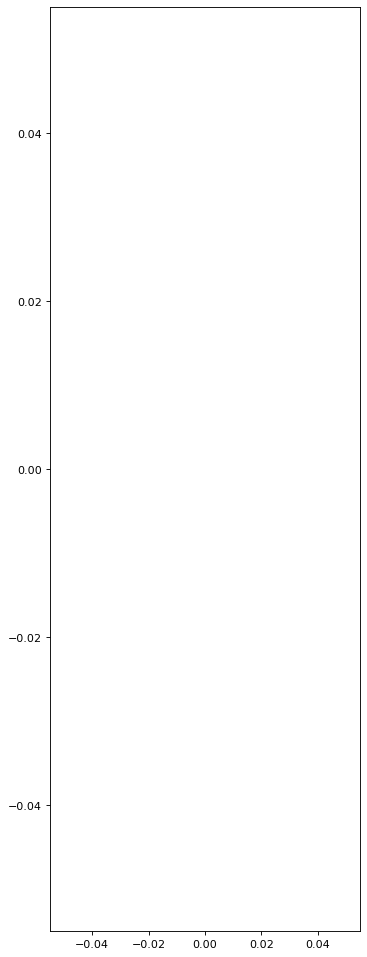

In [150]:
figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
QVLPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### VBX[
- WIth the noun טֶ֨בַח֙ it means: slaugher for food (Gen 43:16). 
- Eze 21:15: used for killing of human beings (טֶ֨בַח֙).
- Psa 37:14 killing of human beings.
- Prov 9:2 slauther for food (טֶ֨בַח֙)!

In [245]:
VBXPredObjc=(FormsOfKillingPredObjc[FormsOfKillingPredObjc['lex3']=="VBX["])
VBXPredObjc.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,lex3,lex_utf83,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,bol_dict_EN5,lex5,lex_utf85,sp5
14,15,Genesis,43,16,432610,clause,וּטְבֹ֤חַ טֶ֨בַח֙,666808,phrase,טְבֹ֤חַ,Pred,24458,word,טְבֹ֤חַ,"qal: slaughter, kill;",טבח,VBX[,טבח,666809,phrase,טֶ֨בַח֙,Objc,24459,word,טֶ֨בַח֙,slaughtering,VBX/,טבח,subs
208,209,Ezekiel,21,15,482307,clause,לְמַ֨עַן טְבֹ֤חַ טֶ֨בַח֙,813310,phrase,לְמַ֨עַן טְבֹ֤חַ,Pred,274767,word,טְבֹ֤חַ,"qal: slaughter, kill;",טבח,VBX[,טבח,813311,phrase,טֶ֨בַח֙,Objc,274768,word,טֶ֨בַח֙,slaughtering,VBX/,טבח,subs
229,230,Psalms,37,14,491921,clause,לִ֝טְבֹ֗וחַ יִשְׁרֵי־דָֽרֶךְ׃,839433,phrase,לִ֝טְבֹ֗וחַ,Pred,316367,word,טְבֹ֗וחַ,"qal: slaughter, kill;",טבח,VBX[,טבח,839434,phrase,יִשְׁרֵי־דָֽרֶךְ׃,Objc,316369,word,דָֽרֶךְ׃,"way, road, journey; custom (ext)",DRK/,דרך,subs
236,237,Proverbs,9,2,501057,clause,טָבְחָ֣ה טִ֭בְחָהּ,862943,phrase,טָבְחָ֣ה,Pred,349187,word,טָבְחָ֣ה,"qal: slaughter, kill;",טבח,VBX[,טבח,862944,phrase,טִ֭בְחָהּ,Objc,349188,word,טִ֭בְחָהּ,slaughtering,VBX/,טבח,subs


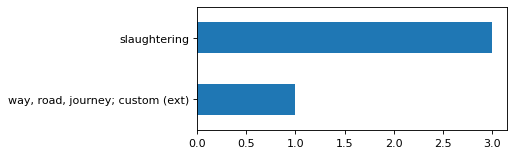

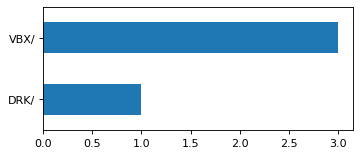

In [246]:
figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')
VBXPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()
figure(num=None, figsize=(5, 2), dpi=80, facecolor='w', edgecolor='k')
VBXPredObjc.lex5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### CXV[

In [260]:
CXVPredObjc=(FormsOfKillingPredObjc[FormsOfKillingPredObjc['lex3']=="CXV["])
CXVPredObjc.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,bol_dict_EN3,bol_dict_HebArm3,lex3,lex_utf83,NODE4,TYPE4,TEXT4,function4,NODE5,TYPE5,TEXT5,bol_dict_EN5,bol_dict_HebArm5,lex5,lex_utf85,sp5
2,3,Genesis,22,10,429540,clause,לִשְׁחֹ֖ט אֶת־בְּנֹֽו׃,657689,phrase,לִשְׁחֹ֖ט,Pred,10467,word,שְׁחֹ֖ט,"qal: slaughter, kill; ni: be slaughtered;",שׁחט I,CXV[,שׁחט,657690,phrase,אֶת־בְּנֹֽו׃,Objc,10469,word,בְּנֹֽו׃,son,בֵּן I,BN/,בן,subs
10,11,Genesis,37,31,431786,clause,וַֽיִּשְׁחֲטוּ֙ שְׂעִ֣יר עִזִּ֔ים,664348,phrase,יִּשְׁחֲטוּ֙,Pred,20747,word,יִּשְׁחֲטוּ֙,"qal: slaughter, kill; ni: be slaughtered;",שׁחט I,CXV[,שׁחט,664349,phrase,שְׂעִ֣יר עִזִּ֔ים,Objc,20748,word,שְׂעִ֣יר,he-goat (n); hairy (adj),שָׂעִיר I,F<JR/,שׂעיר,subs
11,12,Genesis,37,31,431786,clause,וַֽיִּשְׁחֲטוּ֙ שְׂעִ֣יר עִזִּ֔ים,664348,phrase,יִּשְׁחֲטוּ֙,Pred,20747,word,יִּשְׁחֲטוּ֙,"qal: slaughter, kill; ni: be slaughtered;",שׁחט I,CXV[,שׁחט,664349,phrase,שְׂעִ֣יר עִזִּ֔ים,Objc,20749,word,עִזִּ֔ים,goat; goathair,עֵז III,<Z==/,עז,subs
17,18,Exodus,12,21,434815,clause,וְשַׁחֲט֥וּ הַפָּֽסַח׃,673413,phrase,שַׁחֲט֥וּ,Pred,35166,word,שַׁחֲט֥וּ,"qal: slaughter, kill; ni: be slaughtered;",שׁחט I,CXV[,שׁחט,673414,phrase,הַפָּֽסַח׃,Objc,35168,word,פָּֽסַח׃,"Passover (festival, sacrifice)",פֶּסַח I,PSX/,פסח,subs
32,33,Exodus,29,11,436602,clause,וְשָׁחַטְתָּ֥ אֶת־הַפָּ֖ר לִפְנֵ֣י יְהוָ֑ה פֶּ...,678958,phrase,שָׁחַטְתָּ֥,Pred,44735,word,שָׁחַטְתָּ֥,"qal: slaughter, kill; ni: be slaughtered;",שׁחט I,CXV[,שׁחט,678959,phrase,אֶת־הַפָּ֖ר,Objc,44738,word,פָּ֖ר,young bull,פַּר,PR/,פר,subs


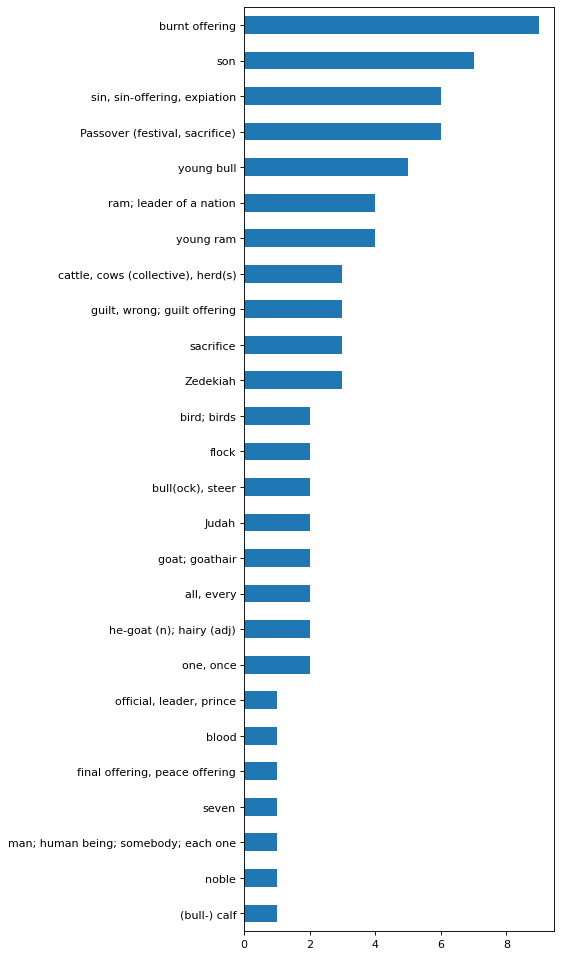

In [261]:
figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
CXVPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

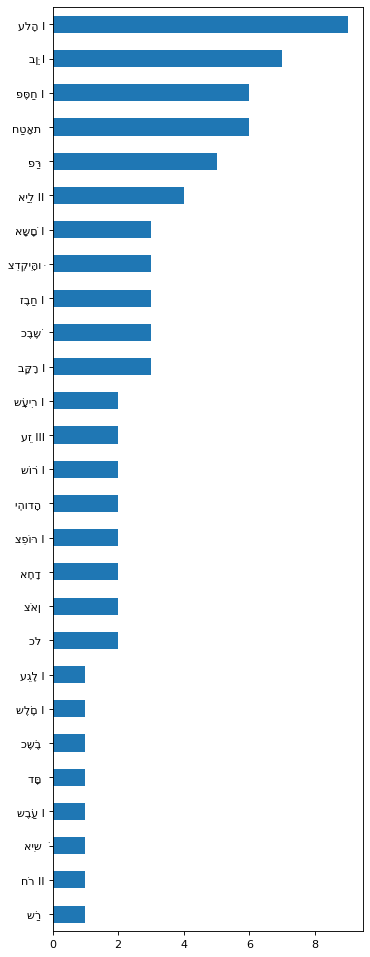

In [262]:

figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
CXVPredObjc.bol_dict_HebArm5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

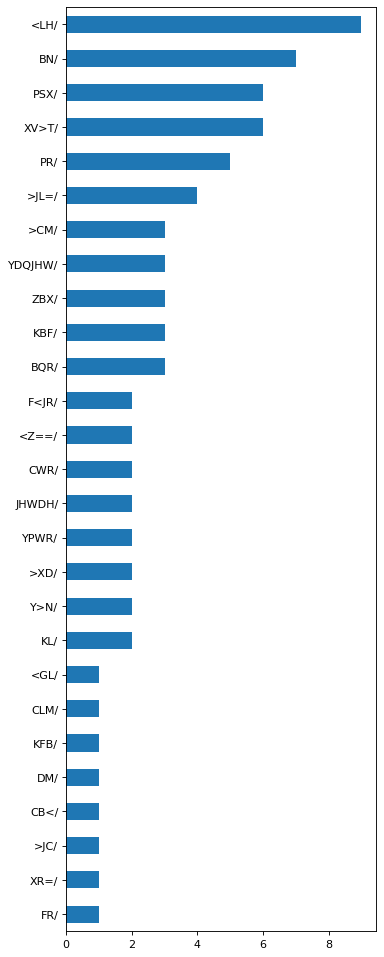

In [263]:

figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
CXVPredObjc.lex5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

- Gen 22:10 Akeda
- Lev 1:5/22:28/ "son of the cattle" - clear cultic context - Eze 16:21 human sacrifice (slaughering of children, like the sons of bulls)
- Only Jeremiah and 2 Kgs know of the slaughering of the sons

In [163]:
CXVPredObjc='''
clause
    phrase function=Pred
        word lex=CXV[ lex_utf8
    phrase function=Objc
        word lex=YDQJHW/|JHWDH/|BN/ lex_utf8
'''
CXVPredObjc  = OT.search(CXVPredObjc)
OT.table(CXVPredObjc, start=1, end=20, condensed=False, colorMap={2: 'magenta'})

  0.67s 12 results


n,p,clause,phrase,word,phrase,word
1,Genesis 22:10,לִשְׁחֹ֖ט אֶת־בְּנֹֽו׃,לִשְׁחֹ֖ט,שְׁחֹ֖ט,אֶת־בְּנֹֽו׃,בְּנֹֽו׃
2,Leviticus 1:5,וְשָׁחַ֛ט אֶת־בֶּ֥ן הַבָּקָ֖ר לִפְנֵ֣י יְהוָ֑ה,שָׁחַ֛ט,שָׁחַ֛ט,אֶת־בֶּ֥ן הַבָּקָ֖ר,בֶּ֥ן
3,Leviticus 22:28,אֹתֹ֣ו וְאֶת־בְּנֹ֔ו לֹ֥א תִשְׁחֲט֖וּ בְּיֹ֥ום אֶחָֽד׃,תִשְׁחֲט֖וּ,תִשְׁחֲט֖וּ,אֹתֹ֣ו וְאֶת־בְּנֹ֔ו,בְּנֹ֔ו
4,2_Kings 25:7,וְאֶת־בְּנֵי֙ צִדְקִיָּ֔הוּ שָׁחֲט֖וּ לְעֵינָ֑יו,שָׁחֲט֖וּ,שָׁחֲט֖וּ,אֶת־בְּנֵי֙ צִדְקִיָּ֔הוּ,בְּנֵי֙
5,2_Kings 25:7,וְאֶת־בְּנֵי֙ צִדְקִיָּ֔הוּ שָׁחֲט֖וּ לְעֵינָ֑יו,שָׁחֲט֖וּ,שָׁחֲט֖וּ,אֶת־בְּנֵי֙ צִדְקִיָּ֔הוּ,צִדְקִיָּ֔הוּ
6,Jeremiah 39:6,וַיִּשְׁחַט֩ מֶ֨לֶךְ בָּבֶ֜ל אֶת־בְּנֵ֧י צִדְקִיָּ֛הוּ בְּרִבְלָ֖ה לְעֵינָ֑יו,יִּשְׁחַט֩,יִּשְׁחַט֩,אֶת־בְּנֵ֧י צִדְקִיָּ֛הוּ,בְּנֵ֧י
7,Jeremiah 39:6,וַיִּשְׁחַט֩ מֶ֨לֶךְ בָּבֶ֜ל אֶת־בְּנֵ֧י צִדְקִיָּ֛הוּ בְּרִבְלָ֖ה לְעֵינָ֑יו,יִּשְׁחַט֩,יִּשְׁחַט֩,אֶת־בְּנֵ֧י צִדְקִיָּ֛הוּ,צִדְקִיָּ֛הוּ
8,Jeremiah 39:6,וְאֵת֙ כָּל־חֹרֵ֣י יְהוּדָ֔ה שָׁחַ֖ט מֶ֥לֶךְ בָּבֶֽל׃,שָׁחַ֖ט,שָׁחַ֖ט,אֵת֙ כָּל־חֹרֵ֣י יְהוּדָ֔ה,יְהוּדָ֔ה
9,Jeremiah 52:10,וַיִּשְׁחַ֧ט מֶֽלֶךְ־בָּבֶ֛ל אֶת־בְּנֵ֥י צִדְקִיָּ֖הוּ לְעֵינָ֑יו,יִּשְׁחַ֧ט,יִּשְׁחַ֧ט,אֶת־בְּנֵ֥י צִדְקִיָּ֖הוּ,בְּנֵ֥י
10,Jeremiah 52:10,וַיִּשְׁחַ֧ט מֶֽלֶךְ־בָּבֶ֛ל אֶת־בְּנֵ֥י צִדְקִיָּ֖הוּ לְעֵינָ֑יו,יִּשְׁחַ֧ט,יִּשְׁחַ֧ט,אֶת־בְּנֵ֥י צִדְקִיָּ֖הוּ,צִדְקִיָּ֖הוּ


In [28]:
# first we sort the dataframe so that we can plot the sorted dataframe
HRG_sorted = HRG.sort_values('lex_utf85', ascending=True)

HRG_sorted.plot(kind='barh', x='R', y='lex3')

# lets add a title and some lables
plt.title('Distribution of Verbal Classes')
plt.xlabel('number of occurence')
plt.ylabel('verbal class presence')

# now lets show the barh (bar horizontal)
plt.show()

TypeError: no numeric data to plot

In [60]:
FormsOfKilling='''
word lex=QVL[ lex_utf8

'''
FormsOfKilling  = OT.search(FormsOfKilling)
OT.table(FormsOfKilling, start=1, end=2, condensed=False, colorMap={2: 'magenta'})

  0.21s 10 results


n,p,word
1,Psalms 139:19,תִּקְטֹ֖ל
2,Job 13:15,יִ֭קְטְלֵנִי


#### Pred + ObjcSuffix

In [117]:
FormsOfKillingPreO='''
clause
    phrase function=PreO
        word lex=HRG[|MWT[|QVL[|VBX[|CXV[ lex_utf8 prs
'''
FormsOfKillingPreO  = OT.search(FormsOfKillingPreO)
OT.table(FormsOfKillingPreO, start=1, end=2, condensed=False, colorMap={2: 'magenta'})

  0.34s 128 results


n,p,clause,phrase,word
1,Genesis 4:8,וַיַּהַרְגֵֽהוּ׃,יַּהַרְגֵֽהוּ׃,יַּהַרְגֵֽהוּ׃
2,Genesis 4:14,כָל־יַֽהַרְגֵֽנִי׃,יַֽהַרְגֵֽנִי׃,יַֽהַרְגֵֽנִי׃


In [118]:
OT.export(FormsOfKillingPreO, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/3-A13_BibleBook_OT_Jeremiah', toFile='FormsOfKillingPreO.tsv')

In [119]:
FormsOfKillingPreO=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/3-A13_BibleBook_OT_Jeremiah/FormsOfKillingPreO.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
FormsOfKillingPreO.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,lex_utf83,prs3
0,1,Genesis,4,8,427913,clause,וַיַּהַרְגֵֽהוּ׃,652635,phrase,יַּהַרְגֵֽהוּ׃,PreO,1807,word,יַּהַרְגֵֽהוּ׃,HRG[,הרג,HW
1,2,Genesis,4,14,427937,clause,כָל־יַֽהַרְגֵֽנִי׃,652703,phrase,יַֽהַרְגֵֽנִי׃,PreO,1906,word,יַֽהַרְגֵֽנִי׃,HRG[,הרג,NJ
2,3,Genesis,4,25,427978,clause,כִּ֥י הֲרָגֹ֖ו קָֽיִן׃,652835,phrase,הֲרָגֹ֖ו,PreO,2099,word,הֲרָגֹ֖ו,HRG[,הרג,W
3,4,Genesis,20,11,429340,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,657053,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,HRG[,הרג,NJ
4,5,Genesis,26,7,430106,clause,פֶּן־יַֽהַרְגֻ֜נִי אַנְשֵׁ֤י הַמָּקֹום֙ עַל־רִ...,659326,phrase,יַֽהַרְגֻ֜נִי,PreO,13114,word,יַֽהַרְגֻ֜נִי,HRG[,הרג,NJ


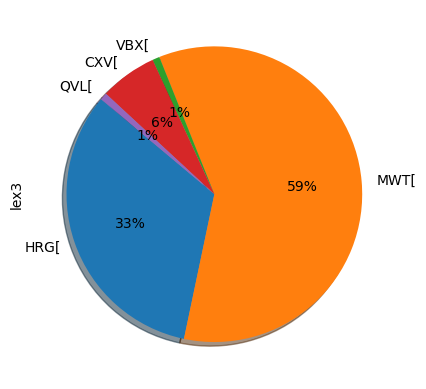

In [120]:
FormsOfKillingPreO.lex3.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

In [121]:
sns.lmplot(x="S1", y="R", data=BHSAbrahamSearch, hue='lex1', height=5, aspect=7/3, fit_reg=False, scatter_kws={"s": 200})
ax = plt.gca()
ax.set_ylabel('Number of occurence of ImpChainType')
ax.set_xlabel('OT books')

NameError: name 'BHSAbrahamSearch' is not defined

##### HRG[

In [122]:
HRGPreO=(FormsOfKillingPreO[FormsOfKillingPreO['lex3']=="HRG["])
HRGPreO.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,lex_utf83,prs3
0,1,Genesis,4,8,427913,clause,וַיַּהַרְגֵֽהוּ׃,652635,phrase,יַּהַרְגֵֽהוּ׃,PreO,1807,word,יַּהַרְגֵֽהוּ׃,HRG[,הרג,HW
1,2,Genesis,4,14,427937,clause,כָל־יַֽהַרְגֵֽנִי׃,652703,phrase,יַֽהַרְגֵֽנִי׃,PreO,1906,word,יַֽהַרְגֵֽנִי׃,HRG[,הרג,NJ
2,3,Genesis,4,25,427978,clause,כִּ֥י הֲרָגֹ֖ו קָֽיִן׃,652835,phrase,הֲרָגֹ֖ו,PreO,2099,word,הֲרָגֹ֖ו,HRG[,הרג,W
3,4,Genesis,20,11,429340,clause,וַהֲרָג֖וּנִי עַל־דְּבַ֥ר אִשְׁתִּֽי׃,657053,phrase,הֲרָג֖וּנִי,PreO,9483,word,הֲרָג֖וּנִי,HRG[,הרג,NJ
4,5,Genesis,26,7,430106,clause,פֶּן־יַֽהַרְגֻ֜נִי אַנְשֵׁ֤י הַמָּקֹום֙ עַל־רִ...,659326,phrase,יַֽהַרְגֻ֜נִי,PreO,13114,word,יַֽהַרְגֻ֜נִי,HRG[,הרג,NJ


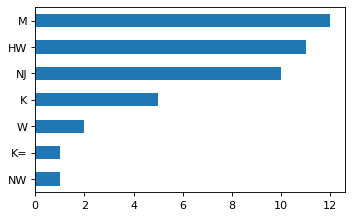

In [127]:
figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
HRGPreO.prs3.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### MWT[

In [130]:
MWTPreO=(FormsOfKillingPreO[FormsOfKillingPreO['lex3']=="MWT["])
MWTPreO.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,lex_utf83,prs3
6,7,Genesis,37,18,431722,clause,לַהֲמִיתֹֽו׃,664171,phrase,לַהֲמִיתֹֽו׃,PreO,20507,word,הֲמִיתֹֽו׃,MWT[,מות,W
8,9,Genesis,38,7,431834,clause,וַיְמִתֵ֖הוּ יְהוָֽה׃,664491,phrase,יְמִתֵ֖הוּ,PreO,20941,word,יְמִתֵ֖הוּ,MWT[,מות,HW
10,11,Exodus,4,24,433970,clause,הֲמִיתֹֽו׃,670796,phrase,הֲמִיתֹֽו׃,PreO,30684,word,הֲמִיתֹֽו׃,MWT[,מות,W
18,19,Numbers,16,13,442704,clause,לַהֲמִיתֵ֖נוּ בַּמִּדְבָּ֑ר,697566,phrase,לַהֲמִיתֵ֖נוּ,PreO,80300,word,הֲמִיתֵ֖נוּ,MWT[,מות,NW
20,21,Numbers,35,19,444784,clause,ה֥וּא יְמִיתֶֽנּוּ׃,703896,phrase,יְמִיתֶֽנּוּ׃,PreO,92196,word,יְמִיתֶֽנּוּ׃,MWT[,מות,HW


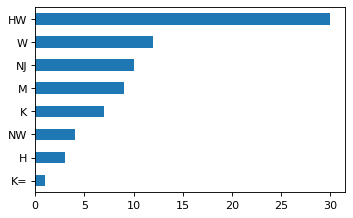

In [131]:
figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
MWTPreO.prs3.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### QVL[
Only object is a human being.

In [132]:
QVLPreO=(FormsOfKillingPreO[FormsOfKillingPreO['lex3']=="QVL["])
QVLPreO.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,lex_utf83,prs3
107,108,Job,13,15,498421,clause,יִ֭קְטְלֵנִי,855622,phrase,יִ֭קְטְלֵנִי,PreO,339388,word,יִ֭קְטְלֵנִי,QVL[,קטל,NJ


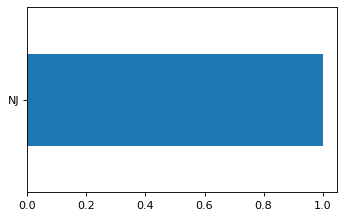

In [133]:
figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
QVLPreO.prs3.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### VBX[

This one case deals with the slaughter of a cow as an illegal action. For what purpose the slaugther takes place is unclear.

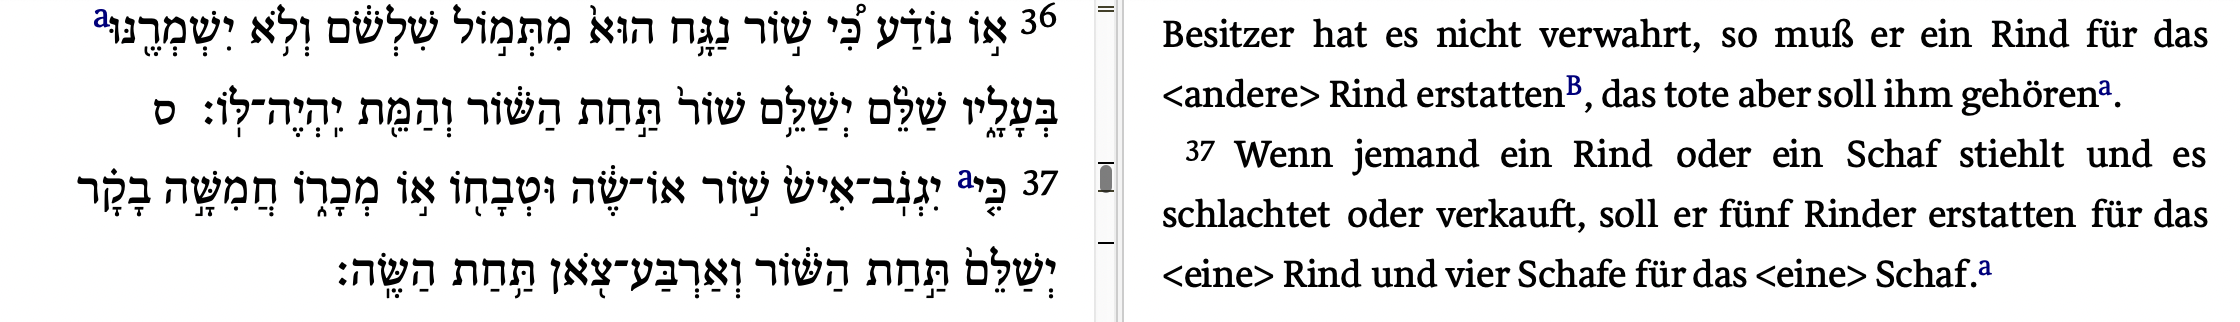


In [134]:
VBXPreO=(FormsOfKillingPreO[FormsOfKillingPreO['lex3']=="VBX["])
VBXPreO.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,lex_utf83,prs3
13,14,Exodus,21,37,435909,clause,וּטְבָחֹ֖ו,676752,phrase,טְבָחֹ֖ו,PreO,40598,word,טְבָחֹ֖ו,VBX[,טבח,W


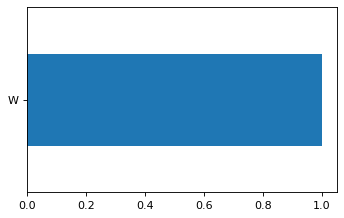

In [135]:
figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
VBXPreO.prs3.value_counts(sort=False).sort_values().plot.barh()
plt.show()

##### CXV[
- cultic: Lev 3:2; 9:15; 2 Chr 29:24.

- hyperbolic/metaphorical use: Num 14:16 (God slaughters his people). The parallel account in Deut 9:28 uses the word MWT[. Judg 12:6 (killing of Ephraimites who are not able to pronounce Shibollet). 1 Kgs 18:40 (Elija slaughters the Baal Prophets). 2 kgs 10:14 (Jehu slaughters the brothers of Ahasja). Jer 41:7 (Ishmael slaughters a group of mourning people).



In [138]:
CXVPreO=(FormsOfKillingPreO[FormsOfKillingPreO['lex3']=="CXV["])
CXVPreO.head(15)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,function2,NODE3,TYPE3,TEXT3,lex3,lex_utf83,prs3
14,15,Leviticus,3,2,437989,clause,וּשְׁחָטֹ֕ו פֶּ֖תַח אֹ֣הֶל מֹועֵ֑ד,683165,phrase,שְׁחָטֹ֕ו,PreO,53186,word,שְׁחָטֹ֕ו,CXV[,שׁחט,W
15,16,Leviticus,9,15,438660,clause,וַיִּשְׁחָטֵ֥הוּ,685250,phrase,יִּשְׁחָטֵ֥הוּ,PreO,57188,word,יִּשְׁחָטֵ֥הוּ,CXV[,שׁחט,HW
17,18,Numbers,14,16,442422,clause,וַיִּשְׁחָטֵ֖ם בַּמִּדְבָּֽר׃,696711,phrase,יִּשְׁחָטֵ֖ם,PreO,78761,word,יִּשְׁחָטֵ֖ם,CXV[,שׁחט,M
30,31,Judges,12,6,452713,clause,וַיִּשְׁחָט֖וּהוּ אֶל־מַעְבְּרֹ֣ות הַיַּרְדֵּ֑ן,727854,phrase,יִּשְׁחָט֖וּהוּ,PreO,135545,word,יִּשְׁחָט֖וּהוּ,CXV[,שׁחט,HW
77,78,1_Kings,18,40,463940,clause,וַיִּשְׁחָטֵ֖ם שָֽׁם׃,761802,phrase,יִּשְׁחָטֵ֖ם,PreO,191266,word,יִּשְׁחָטֵ֖ם,CXV[,שׁחט,M
80,81,2_Kings,10,14,466340,clause,וַֽיִּשְׁחָט֞וּם אֶל־בֹּ֣ור בֵּֽית־עֵ֗קֶד אַרְ...,768520,phrase,יִּשְׁחָט֞וּם,PreO,201468,word,יִּשְׁחָט֞וּם,CXV[,שׁחט,M
96,97,Jeremiah,41,7,478498,clause,וַיִּשְׁחָטֵ֞ם יִשְׁמָעֵ֤אל בֶּן־נְתַנְיָה֙ אֶ...,802579,phrase,יִּשְׁחָטֵ֞ם,PreO,257479,word,יִּשְׁחָטֵ֞ם,CXV[,שׁחט,M
126,127,2_Chronicles,29,24,514893,clause,וַיִּשְׁחָטוּם֙ הַכֹּ֣הֲנִ֔ים,902312,phrase,יִּשְׁחָטוּם֙,PreO,421518,word,יִּשְׁחָטוּם֙,CXV[,שׁחט,M


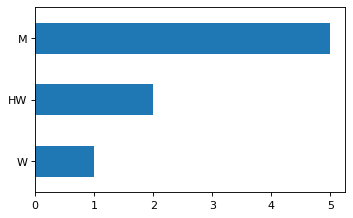

In [137]:
figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
CXVPreO.prs3.value_counts(sort=False).sort_values().plot.barh()
plt.show()

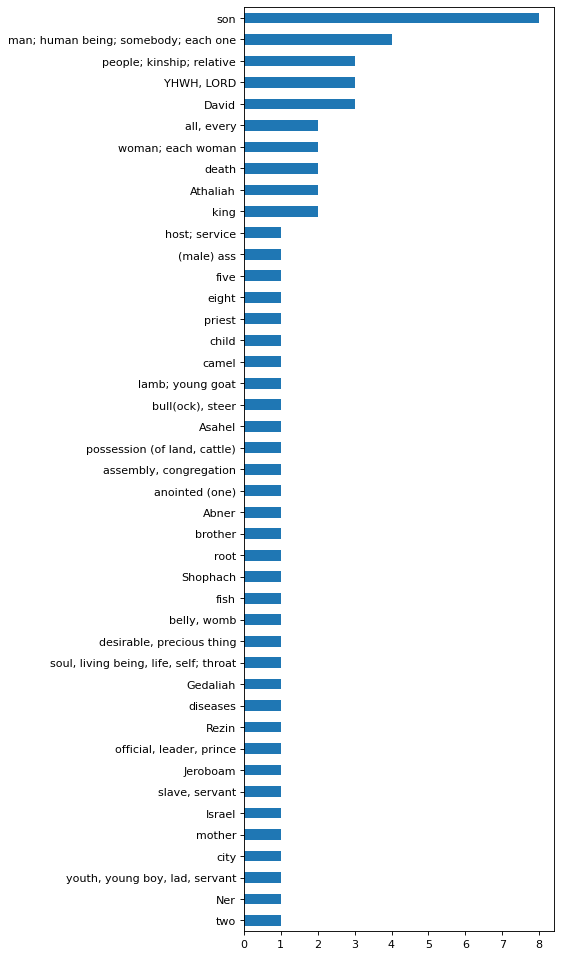

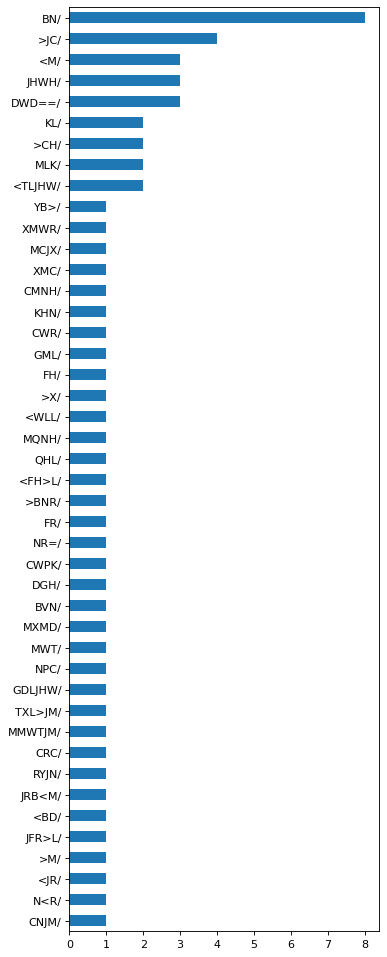

In [156]:
figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
MWTPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
MWTPredObjc.lex5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

In [ ]:
figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
MWTPredObjc.bol_dict_EN5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

figure(num=None, figsize=(5, 15), dpi=80, facecolor='w', edgecolor='k')
MWTPredObjc.lex5.value_counts(sort=False).sort_values().plot.barh()
plt.show()

#### Slaughter language bible books

In [235]:
JerSlaughterWords='''
word lex~^.*MWT.*|^.*HRG.*|^.*CXV.*|^.*VBX.* lex_utf8 bol_dict_EN vs bol_dict_HebArm
'''
JerSlaughterWords  = OT.search(JerSlaughterWords)
OT.table(JerSlaughterWords, start=1, end=1, condensed=False, colorMap={2: 'magenta'})

  0.53s 1465 results


n,p,word
1,Genesis 1:26,דְמוּתֵ֑נוּ


In [236]:
OT.export(JerSlaughterWords, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/3-A13_BibleBook_OT_Jeremiah', toFile='JerSlaughterWords.tsv')

In [238]:
JerSlaughterWords=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/3-A13_BibleBook_OT_Jeremiah/JerSlaughterWords_manipulated.txt',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
JerSlaughterWords.head()

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,bol_dict_HebArm1,lex1,lex_utf81,vs1
0,7,Genesis,4,8,1807,word,יַּהַרְגֵֽהוּ׃,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,qal
1,8,Genesis,4,14,1906,word,יַֽהַרְגֵֽנִי׃,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,qal
2,9,Genesis,4,15,1913,word,הֹרֵ֣ג,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,qal
3,10,Genesis,4,23,2060,word,הָרַ֨גְתִּי֙,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,qal
4,11,Genesis,4,25,2099,word,הֲרָגֹ֖ו,"qal: kill, slay; ni: be killed, slain; pu: be ...",הרג,HRG[,הרג,qal


In [240]:
JerSlaughterWords.groupby(['bol_dict_HebArm1','S1']).count().sort_values(['lex_utf81'], ascending=True)


,,R,S2,S3,NODE1,TYPE1,TEXT1,bol_dict_EN1,lex1,lex_utf81,vs1
bol_dict_HebArm1,S1,,,,,,,,,,
הרג,Habakkuk,1,1,1,1,1,1,1,1,1,1
טַבַּח,Daniel,1,1,1,1,1,1,1,1,1,0
מַטְבֵּחַ,Isaiah,1,1,1,1,1,1,1,1,1,0
טִבְחָה I,Jeremiah,1,1,1,1,1,1,1,1,1,0
מָוֶת,Song_of_songs,1,1,1,1,1,1,1,1,1,0
טִבְחָה I,Psalms,1,1,1,1,1,1,1,1,1,0
מֹות,Ezra,1,1,1,1,1,1,1,1,1,0
מָוֶת,Habakkuk,1,1,1,1,1,1,1,1,1,0
מות,Esther,1,1,1,1,1,1,1,1,1,1


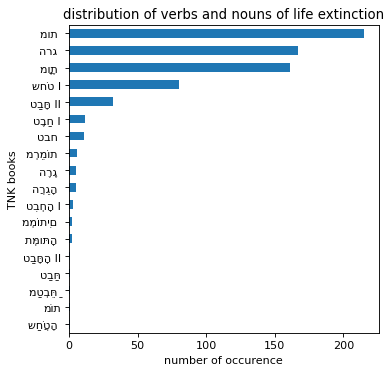

In [242]:
figure(num=None, figsize=(5, 5), dpi=80, facecolor='w', edgecolor='k')
JerSlaughterWords.groupby("bol_dict_HebArm1").size().sort_values(ascending=True).plot.barh()
plt.xlabel('number of occurence')
plt.ylabel('TNK books')
plt.title('distribution of verbs and nouns of life extinction')
plt.show()

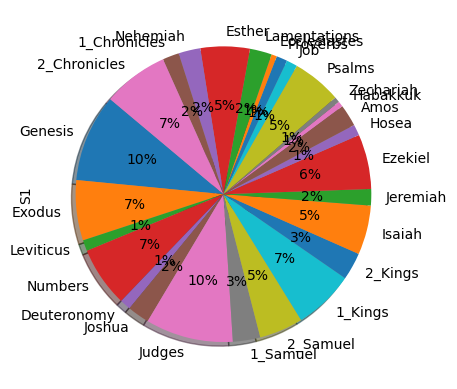

In [224]:
(JerSlaughterWords[JerSlaughterWords['lex1']=='HRG[']).S1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

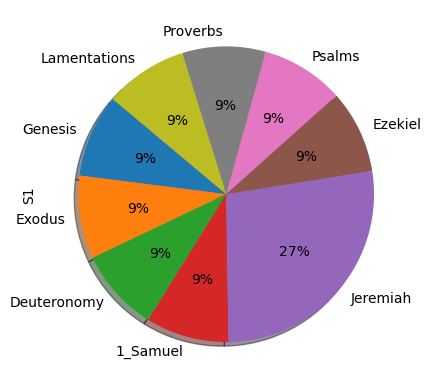

In [225]:
(JerSlaughterWords[JerSlaughterWords['lex1']=='VBX[']).S1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

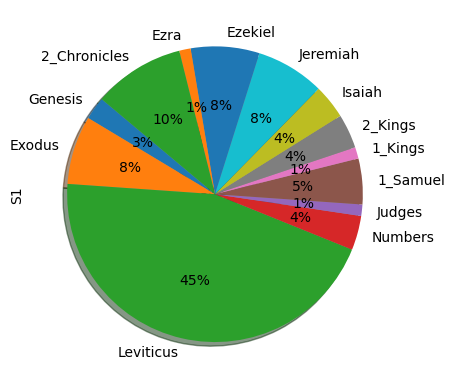

In [226]:
(JerSlaughterWords[JerSlaughterWords['lex1']=='CXV[']).S1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()

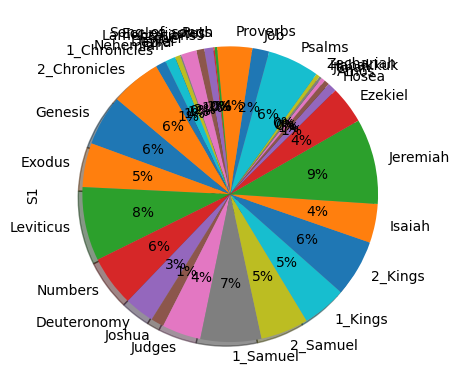

In [243]:
(JerSlaughterWords).S1.value_counts(sort=False).plot.pie(autopct='%1.0f%%', shadow=True, startangle=140)
plt.show()